# COVID-19 - Clinical Data to assess diagnosis
https://www.kaggle.com/S%C3%ADrio-Libanes/covid19  
La idea es predecir si el paciente termina necesitando ingresar en ICU (UCI: unidad de cuidados intensivos) a partir de bastantes parámetros medidos varias veces sobre el mismo paciente en varias ventanas horarias.  
Básicamente un quilombo porque tenemos varias entradas para el mismo paciente

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel("datasets/covid/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")
df

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0


In [3]:
df.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,...,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,...,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.976190,-0.979798,-1.000000,-0.984944,-0.989822,-1.000000,-0.975924,-0.980333,0.000000
75%,288.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.647059,-0.595238,-0.878788,-0.645482,-0.522176,-0.662529,-0.634409,-0.594677,-0.880155,1.000000
max,384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
df.columns.values

array(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL',
       'GENDER', 'DISEASE GROUPING 1', 'DISEASE GROUPING 2',
       'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 'DISEASE GROUPING 5',
       'DISEASE GROUPING 6', 'HTN', 'IMMUNOCOMPROMISED', 'OTHER',
       'ALBUMIN_MEDIAN', 'ALBUMIN_MEAN', 'ALBUMIN_MIN', 'ALBUMIN_MAX',
       'ALBUMIN_DIFF', 'BE_ARTERIAL_MEDIAN', 'BE_ARTERIAL_MEAN',
       'BE_ARTERIAL_MIN', 'BE_ARTERIAL_MAX', 'BE_ARTERIAL_DIFF',
       'BE_VENOUS_MEDIAN', 'BE_VENOUS_MEAN', 'BE_VENOUS_MIN',
       'BE_VENOUS_MAX', 'BE_VENOUS_DIFF', 'BIC_ARTERIAL_MEDIAN',
       'BIC_ARTERIAL_MEAN', 'BIC_ARTERIAL_MIN', 'BIC_ARTERIAL_MAX',
       'BIC_ARTERIAL_DIFF', 'BIC_VENOUS_MEDIAN', 'BIC_VENOUS_MEAN',
       'BIC_VENOUS_MIN', 'BIC_VENOUS_MAX', 'BIC_VENOUS_DIFF',
       'BILLIRUBIN_MEDIAN', 'BILLIRUBIN_MEAN', 'BILLIRUBIN_MIN',
       'BILLIRUBIN_MAX', 'BILLIRUBIN_DIFF', 'BLAST_MEDIAN', 'BLAST_MEAN',
       'BLAST_MIN', 'BLAST_MAX', 'BLAST_DIFF', 'CALCIUM_MEDIAN',
   

#### Por ahora agarramos solo algunas columnas

In [4]:
cols = ['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'HTN', 'IMMUNOCOMPROMISED', 'HEART_RATE_MEAN',
        'OXYGEN_SATURATION_MIN', 'TEMPERATURE_MAX', 'WINDOW', 'ICU']

In [5]:
df_filtrado = df[cols].copy()

In [6]:
df_filtrado

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,HTN,IMMUNOCOMPROMISED,HEART_RATE_MEAN,OXYGEN_SATURATION_MIN,TEMPERATURE_MAX,WINDOW,ICU
0,0,1,0.0,0.0,-0.283019,0.898990,-0.420290,0-2,0
1,0,1,0.0,0.0,-0.132075,0.838384,0.246377,2-4,0
2,0,1,0.0,0.0,NaN,NaN,NaN,4-6,0
3,0,1,0.0,0.0,NaN,0.898990,-0.275362,6-12,0
4,0,1,0.0,0.0,-0.213031,0.797980,0.362319,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...
1920,384,0,0.0,0.0,0.056604,0.919192,0.246377,0-2,0
1921,384,0,0.0,0.0,-0.113208,0.838384,-0.072464,2-4,0
1922,384,0,0.0,0.0,-0.169811,0.898990,-0.072464,4-6,0
1923,384,0,0.0,0.0,-0.188679,0.797980,0.043478,6-12,0


Realmente no sabemos cómo encararlo sin reducir las entradas a 1 por paciente. Pero perdemos mucha data al agruparlos.

In [7]:
df_group = df_filtrado.groupby("PATIENT_VISIT_IDENTIFIER").agg(
    {
        'PATIENT_VISIT_IDENTIFIER': "mean",
        'AGE_ABOVE65': "mean",
        'HTN': "mean",
        'IMMUNOCOMPROMISED': "mean",
        'HEART_RATE_MEAN': "mean",
        'OXYGEN_SATURATION_MIN': "min",
        'TEMPERATURE_MAX': "max",
#         'WINDOW':  "mean",
        'ICU': "max"
    }
)

In [8]:
df_group

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,HTN,IMMUNOCOMPROMISED,HEART_RATE_MEAN,OXYGEN_SATURATION_MIN,TEMPERATURE_MAX,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,
0,0.0,1.0,0.0,0.0,-0.209375,0.797980,0.362319,1
1,1.0,1.0,1.0,1.0,-0.184459,0.797980,0.710145,1
2,2.0,0.0,0.0,0.0,-0.097048,0.797980,0.101449,1
3,3.0,0.0,0.0,1.0,-0.448553,0.171717,0.623188,0
4,4.0,0.0,0.2,0.0,0.144491,0.898990,0.130435,0
...,...,...,...,...,...,...,...,...
380,380.0,0.0,0.0,1.0,0.282724,0.676768,0.304348,1
381,381.0,1.0,0.0,1.0,-0.339623,0.818182,0.188406,0
382,382.0,0.0,0.0,0.0,-0.289188,0.777778,0.043478,1


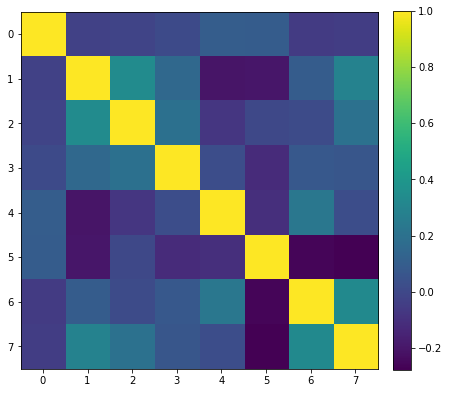

In [11]:
plt.figure(figsize=(7, 7))
plt.imshow(df_group.corr())
plt.colorbar(fraction=0.0459, pad=0.04)  # Magia que encontré online para que la colorbar quede alineada